In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
os.chdir('..')

In [21]:
from src.data.data_loader import StockDataLoader
from src.features.feature_engineering import FeatureEngineer

In [22]:
from sklearn.pipeline import make_pipeline

pl = make_pipeline(
    StockDataLoader(symbols=["AAPL","MSFT"], start_date="2015-01-01", end_date="2023-12-31"),
    FeatureEngineer()
)

In [23]:
tickers = [
    # Technology
    "AAPL", "MSFT", "NVDA", "GOOGL", "GOOG", "AMZN", "META", "TSLA",

    # Finance
    "JPM", "BAC", "WFC", "GS", "C",

    # Healthcare
    "JNJ", "PFE", "MRK", "UNH", "ABBV",

    # Energy
    "XOM", "CVX", "COP", "BP", "SLB",

    # Consumer & Retail
    "WMT", "TGT", "HD", "NKE", "KO", "PEP",

    # Entertainment & Media
    "DIS", "NFLX", "CMCSA", "SONY"
]


In [54]:
pl = make_pipeline(
    StockDataLoader(symbols=tickers, start_date="2015-01-01", end_date="2023-12-31"),
    FeatureEngineer()
)

In [55]:
df = pl.transform(X=None)

INFO:src.data.data_loader:Loading data for AAPL...
INFO:src.data.data_loader:Loading data for AAPL from 2015-01-01 to 2023-12-31
INFO:src.data.data_loader:Successfully loaded 2264 records for AAPL
INFO:src.data.data_loader:Successfully loaded 2264 records for AAPL
INFO:src.data.data_loader:Loading data for MSFT...
INFO:src.data.data_loader:Loading data for MSFT from 2015-01-01 to 2023-12-31
INFO:src.data.data_loader:Successfully loaded 2264 records for MSFT
INFO:src.data.data_loader:Successfully loaded 2264 records for MSFT
INFO:src.data.data_loader:Loading data for NVDA...
INFO:src.data.data_loader:Loading data for NVDA from 2015-01-01 to 2023-12-31
INFO:src.data.data_loader:Successfully loaded 2264 records for NVDA
INFO:src.data.data_loader:Successfully loaded 2264 records for NVDA
INFO:src.data.data_loader:Loading data for GOOGL...
INFO:src.data.data_loader:Loading data for GOOGL from 2015-01-01 to 2023-12-31
INFO:src.data.data_loader:Successfully loaded 2264 records for GOOGL
INFO:

In [121]:
df.set_index(['date','symbol'],inplace=True)

In [56]:
import pandas as pd
pd.set_option('display.max_columns',None)


In [57]:
df.isna().all(axis=0)[df.isna().all(axis=0)==True]

Series([], dtype: bool)

In [58]:
df = df.dropna()

In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [123]:
X=df.drop(columns=['price_change'])
y=df.price_change

In [124]:
from sklearn.model_selection import train_test_split

X_tr,X_test,y_tr,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [125]:
import sklearn
sklearn.set_config(transform_output="pandas")

ct = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse_output=False),X.select_dtypes(include='object').columns)],
            remainder='passthrough',
    verbose_feature_names_out=False
                 )

In [127]:
X_tr

,,sector,industry,currency,exchange,price_1lag,volume_1lag,high_1lag,low_1lag,open_1lag,open_close_change_1lag,open_close_change_pct_1lag,hl_spread_1lag,hl_spread_pct_1lag,price_position_1lag,gap,gap_pct,close_open_ratio_1lag,high_close_ratio_1lag,low_close_ratio_1lag,volume_change_1lag,volume_sma_5,volume_sma_20,volume_ema_5,volume_ema_20,volume_ratio_5,volume_ratio_20,volume_volatility,price_volume_1lag,vwap,rsi_14,rsi_21,sma_5,ema_5,sma_10,ema_10,sma_20,ema_20,sma_50,ema_50,sma_100,ema_100,sma_200,ema_200,macd,macd_signal,macd_histogram,bb_upper,bb_middle,bb_lower,bb_width,bb_position,stoch_k,stoch_d,roc_5,roc_10,roc_20,williams_r,cci,mfi,volatility_10,volatility_20,volatility_30,atr,true_range,adx,sar,ichimoku_conversion,ichimoku_base,ichimoku_span_a,ichimoku_span_b,target
date,symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-08-16 00:00:00-04:00,COP,Energy,Oil & Gas E&P,USD,NYQ,31.937410,5896200.0,31.982842,31.475536,31.543682,0.393728,0.012482,0.507305,0.001925,0.910446,0.219568,0.007010,1.012482,1.001423,0.985538,947400.0,6616380.0,7.846935e+06,6.608845e+06,7.651511e+06,0.891152,0.751402,1.631976e+06,1.883094e+08,30.857767,59.108847,47.677522,31.313505,31.402158,30.978835,31.175077,30.898978,31.193657,32.110747,31.684833,32.383417,32.014771,32.507508,33.067286,-0.158682,-0.356566,0.197884,31.969358,30.898978,29.828598,0.069283,0.985076,98.255784,87.704050,1.491786,6.488257,-0.649955,-1.744216,132.517532,54.604239,0.210850,0.243478,0.266570,0.792324,0.658728,22.619929,31.917706,30.945517,31.356869,32.724029,33.714988,0.007933
2023-04-28 00:00:00-04:00,CVX,Energy,Oil & Gas Integrated,USD,NYQ,150.140305,6417200.0,150.536004,148.449605,149.672658,0.467647,0.003124,2.086399,0.023505,0.810343,0.404698,0.002711,1.003124,1.002636,0.988739,489800.0,6501680.0,6.714545e+06,6.319072e+06,6.843811e+06,0.987006,0.955716,1.644378e+06,9.634804e+08,151.951270,47.972196,61.766565,151.537827,151.158540,152.607114,151.672352,151.912848,150.863458,147.262678,149.773909,151.543522,149.818187,147.672746,146.219083,1.258545,1.727590,-0.469045,156.668161,151.912848,147.157535,0.062606,0.313625,24.071605,22.074391,-1.707385,-2.986818,3.785916,-75.928395,-88.113087,49.651867,0.149482,0.203395,0.212624,2.210383,2.086399,14.747794,149.863564,151.808530,146.007963,143.282943,151.117963,-0.007949
2017-08-11 00:00:00-04:00,C,Financial Services,Banks - Diversified,USD,NYQ,51.498569,19147200.0,52.195735,51.444941,52.096142,-0.597572,-0.011471,0.750794,0.019806,0.071429,-0.329426,-0.006284,0.988529,1.013538,0.998959,-48500.0,17219660.0,1.841638e+07,1.829389e+07,1.845033e+07,1.111938,1.039683,4.443234e+06,9.860534e+08,51.800565,58.803463,53.009153,52.486861,52.229366,52.426554,52.215992,51.729859,51.826939,50.321086,50.441521,47.939183,48.608868,45.807567,45.818614,0.604341,0.696024,-0.091683,53.544548,51.729859,49.915170,0.070160,0.436273,37.938105,60.515564,-1.335699,-0.101607,0.762907,-62.061895,-3.667611,53.322089,0.186201,0.171134,0.179170,0.849156,0.980626,29.490827,49.008394,52.483035,51.742955,49.730283,48.190454,0.016317
2022-09-30 00:00:00-04:00,NVDA,Technology,Semiconductors,USD,NMS,12.205338,532763000.0,12.485001,11.931666,12.433064,-0.227726,-0.018316,0.553335,0.073413,0.494585,-0.287652,-0.022613,0.981684,1.022913,0.977578,-9651000.0,567936600.0,6.282470e+08,5.682831e+08,5.975004e+08,0.938068,0.848015,1.612843e+08,6.502552e+09,13.225849,25.895413,28.154190,12.407693,12.476761,12.753777,12.755155,13.209720,13.473132,15.895881,15.026262,16.311550,16.702297,20.494625,18.587737,-0.986026,-1.016573,0.030547,14.547824,13.209720,11.871615,0.202594,0.124700,10.534425,13.812932,-2.714727,-5.483787,-19.016614,-89.465575,-131.336070,43.500985,0.426672,0.541831,0.561614,0.597068,0.789049,30.210524,16.392213,12.972915,14.925903,17.867217,16.639558,0.030727
2022-05-16 00:00:00-04:00,KO,Consumer Defensive,Beverages - Non-Alcoholic,USD,NYQ,59.183884,16167000.0,59.255929,57.743011,58.364384,0.819500,0.014041,1.512918,0.006394

In [131]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

pl = Pipeline([
    ('ct', ct),
    # ('rf', RandomForestRegressor(oob_score=True,n_jobs=-1,bootstrap=True,max_samples=0.3))
    ('lm', LinearRegression())
])

In [132]:
pl.fit(X_tr,y_tr)

,steps,"[('ct', ...), ('lm', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ohe', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False


In [133]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y_test, pl.predict(X_test))

2.233924093618493

In [134]:
y_test.std()

np.float64(2.228274728817973)

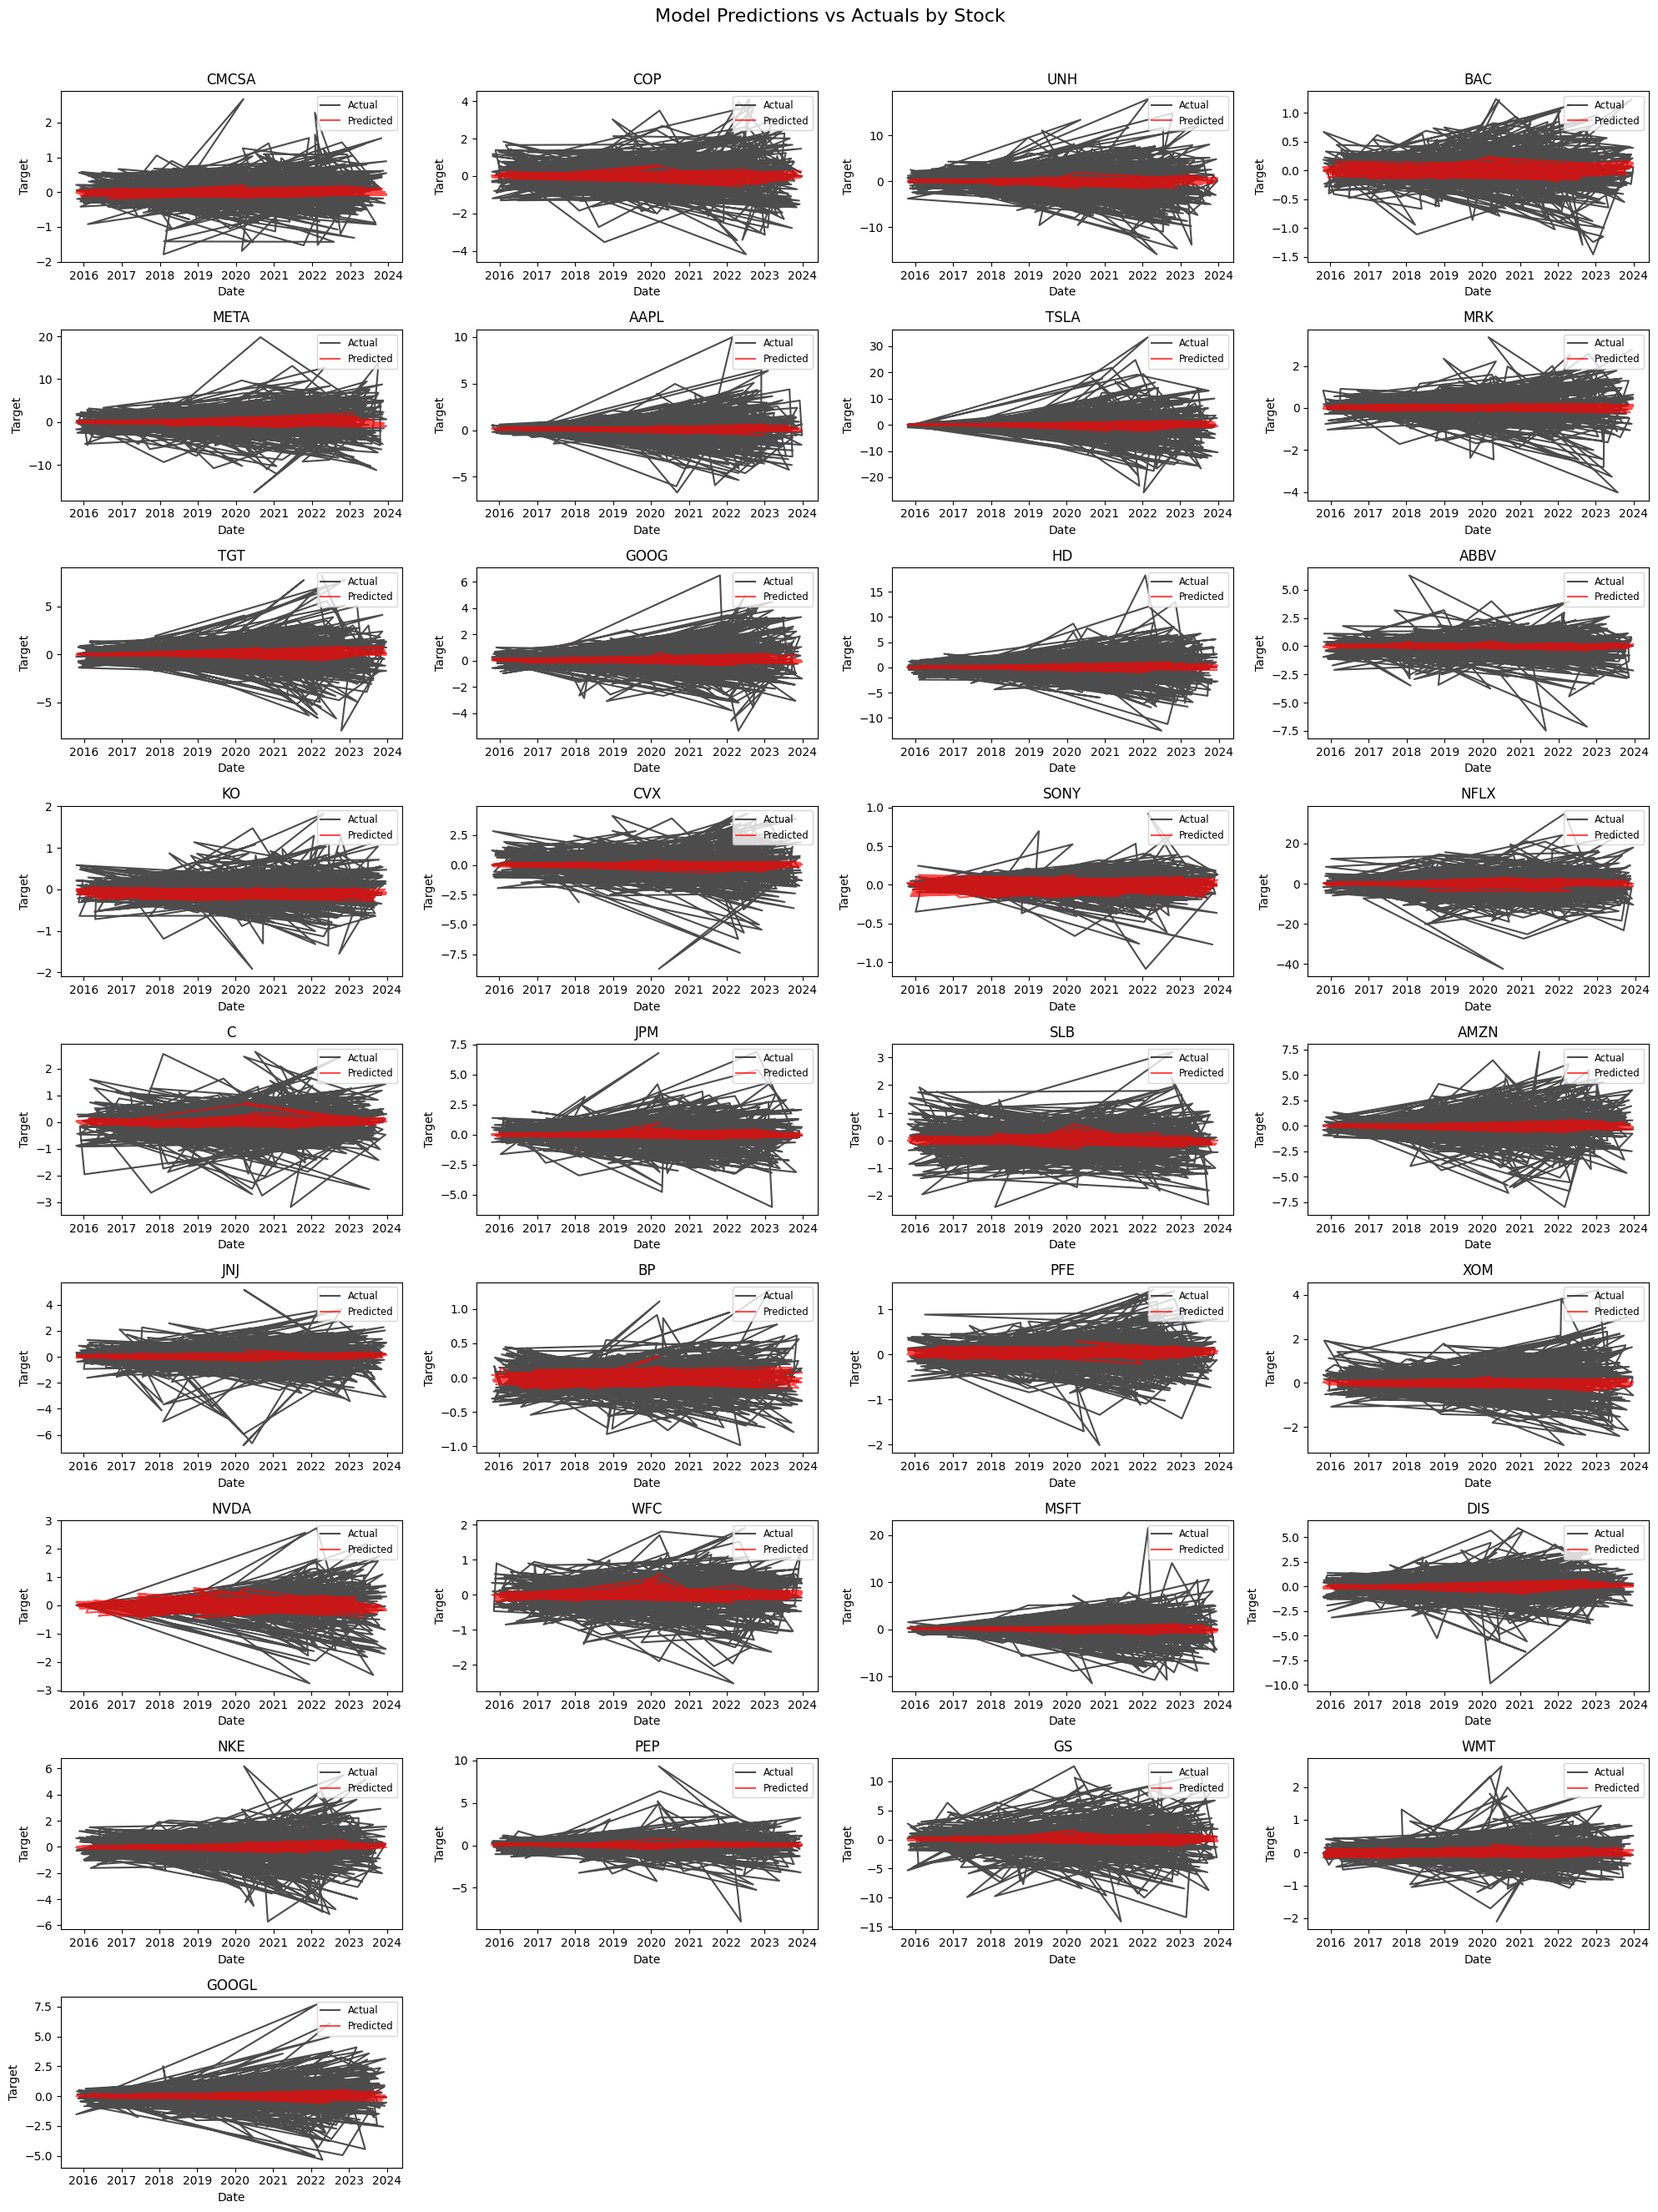

In [143]:

import numpy as np
import matplotlib.pyplot as plt

# Get predictions
y_pred = pl.predict(X_test)

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
}, index=y_test.index)

symbols = plot_df.index.get_level_values('symbol').unique()
n_symbols = len(symbols)
n_cols = min(4, n_symbols)
n_rows = int(np.ceil(n_symbols / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 3*n_rows), sharex=False, sharey=False)
axes = np.array(axes).reshape(-1)  # Flatten axes for easy indexing

for i, symbol in enumerate(symbols):
    ax = axes[i]
    data = plot_df.xs(symbol, level='symbol')
    ax.plot(data.index.get_level_values('date'), data['Actual'], label='Actual', color='black', alpha=0.7)
    ax.plot(data.index.get_level_values('date'), data['Predicted'], label='Predicted', color='red', alpha=0.7)
    ax.set_title(symbol)
    ax.set_xlabel('Date')
    ax.set_ylabel('Target')
    ax.legend(loc='upper right', fontsize='small')

# Hide unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

fig.suptitle('Model Predictions vs Actuals by Stock', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
